<a href="https://colab.research.google.com/github/alpopfares25/Bank-Customer-Churn-Prediction/blob/main/Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Filed and Problem
This dataset is for ABC Multistate bank with following columns:


*   customer_id, Account Number.
*   credit_score, Credit Score.

*   country, Country of Residence.

*   gender, Sex.

*   age, Age.
*   tenure, From how many years he/she is having bank acc in ABC Bank.


*   balance, Account Balance.


*   products_number, Number of Product from bank.

*   credit_card, Is this customer have credit card ?






*  active_member, Is he/she is active Member of bank ?



*   estimated_salary, Salary of Account holder.


*   churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.

##Aim is to Predict the Customer Churn for ABC Bank.
dataset link: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

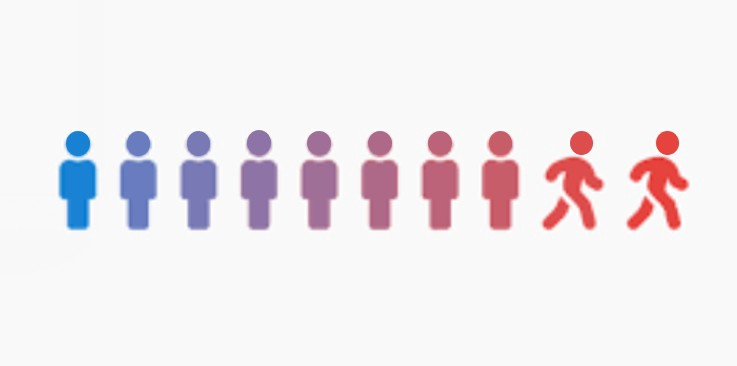

#Import Libraries

In [ ]:
%matplotlib inline


In [ ]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from pandas_profiling import ProfileReport
import seaborn as sns #for visualization


#Read Data

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#1- EDA & Visualization

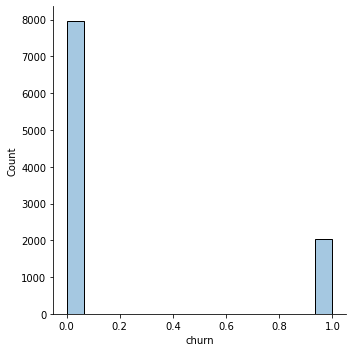

In [ ]:
#churn distribuation
sns.displot(df, x="churn", alpha=.4, rug=False)

In [ ]:
#which country has the largest customer churn
df.groupby('country').describe()['churn'].transpose()

country,France,Germany,Spain
count,5014.000000,2509.000000,2477.000000
mean,0.161548,0.324432,0.166734
std,0.368072,0.468256,0.372813
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


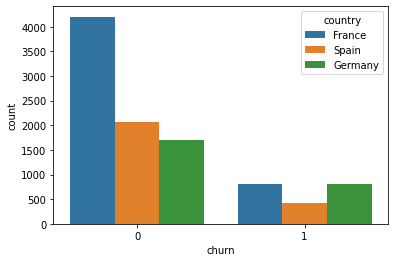

In [ ]:
sns.countplot(x = 'churn', hue= 'country', data = df)

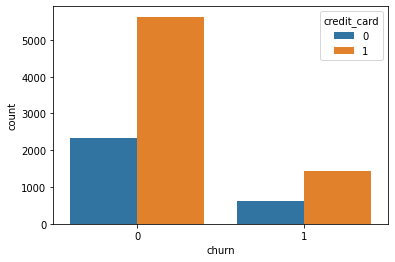

In [ ]:
# number of customers who has left (has credit card or not)
sns.countplot(x = 'churn', hue= 'credit_card', data = df)


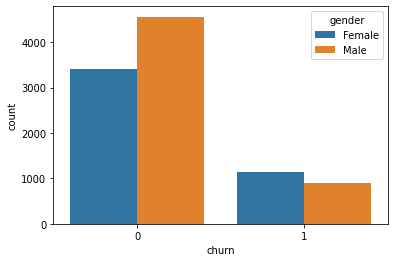

In [ ]:
# females VS males (If the number of women who left is greater than the number of men, or vice versa)
sns.countplot(x = 'churn', hue= 'gender', data = df)

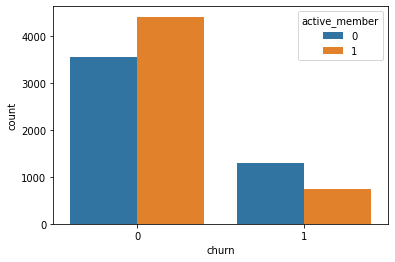

In [ ]:
# females VS males (If the number of active customers who left is greater than the number of not active, or vice versa)
sns.countplot(x = 'churn', hue= 'active_member', data = df)

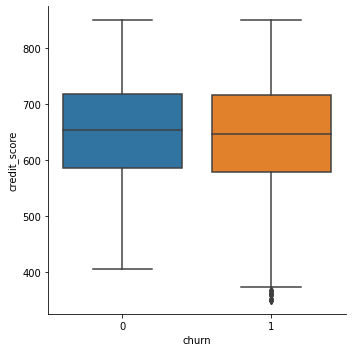

In [ ]:
#churn with credit score
sns.catplot(x = 'churn', y="credit_score", kind="box", data = df)

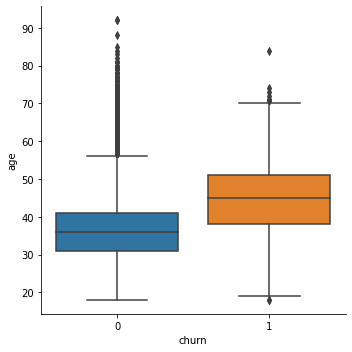

In [ ]:
#churn with age (is older customer will leave ?)
sns.catplot(x = 'churn', y="age", kind="box", data = df)

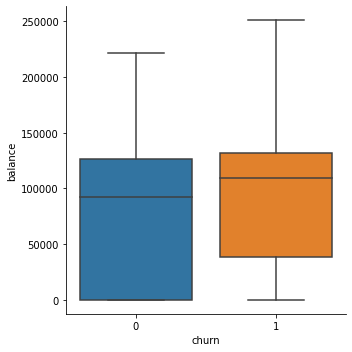

In [ ]:
#churn with balance ( ?)
sns.catplot(x = 'churn', y="balance", kind="box", data = df)

#2-Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
# working with missing data

df.isna().sum()

customer_id         0
credit_score        0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
# working with cateogrical data
df['gender'].replace('Female', 0,inplace=True)
df['gender'].replace('Male', 1,inplace=True)
df.head()


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# split data into train and test
df.drop(['country','customer_id'],axis=1,inplace=True)
y=df['churn']
X=df.drop(['churn'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

#3- Model Optimization (Prediction)

In [ ]:
#using logisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
ac_lr = accuracy_score(y_test,LR.predict(x_test))

#using Perceptron
PR=Perceptron()
PR.fit(x_train,y_train)
ac_pr = accuracy_score(y_test,PR.predict(x_test))

#using SVM
svc=SVC()
svc.fit(x_train,y_train)
ac_svc = accuracy_score(y_test,svc.predict(x_test))

#using Decision Tree
DT= DecisionTreeClassifier(max_depth=4)
DT.fit(x_train,y_train)
ac_dt = accuracy_score(y_test,DT.predict(x_test))

#using Random Forest
RF= RandomForestClassifier()
RF.fit(x_train,y_train)
ac_rf = accuracy_score(y_test,RF.predict(x_test))

#using KNN
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
ac_knn = accuracy_score(y_test,knn.predict(x_test))

#using XGB

xgb=XGBClassifier()
xgb.fit(x_train,y_train)
ac_xgb = accuracy_score(y_test,xgb.predict(x_test))

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Perceptron', 'Decision Tree','XGBoost'],
    'Score': [ac_svc, ac_knn, ac_lr, ac_rf,ac_pr,ac_dt,ac_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,XGBoost,0.8540
3,Random Forest,0.8520
0,Support Vector Machines,0.8465
5,Decision Tree,0.8420
1,KNN,0.8350
2,Logistic Regression,0.8075
4,Perceptron,0.6630


#4- Saving the best model and testing on real data

In [ ]:
#save best model
import joblib
Bank_model=XGBClassifier()
Bank_model.fit(x_train,y_train)
joblib.dump(Bank_model,'Bank_model.h5')


['Bank_model.h5']

In [ ]:
joblib.dump(scaler,'scaler.h5')


['scaler.h5']

In [ ]:
#test on real data
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
second_row_test=[608,0,41,1,83807.86,1,0,1,112542.58]
second_row_test=scaler.transform([second_row_test])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
Bank_model.predict(second_row_test)

array([0])

In [ ]:
third_row_test=[502,0,42,8,159660.80,3,1,0,113931.57]
third_row_test=scaler.transform([third_row_test])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
Bank_model.predict(third_row_test)

array([1])

#5- Deployment model on Web App (ask for it)